# Deskew, Scale, PCA 

####  Goals
* `train_test_split`, deskew, and scale fitting on `X_train` and transforming on `X_test`.
* PCA on scaled data.
* Cluster analysis on PCA components.

#### Output 
* Augmented datasets with PCA data.

In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [2]:
%run lib/__init__.py
%run ./lib/preprocessing.py
%matplotlib inline

## 0. Load Data

In [3]:
removed_outliers_raw_df = pd.read_pickle('./data/removed_outliers_raw_df.pkl')
removed_outliers_raw_df.shape

(1017, 85)

In [4]:
# to get a list of the numerical columns
commute_stats_df = pd.read_pickle('./data/commute_stats_dropped_correlated_features_df.pkl')
commute_stats_df.shape

(39, 8)

## 1. `train_test_split` on ... `commute_removed_outliers_df`

In [5]:
data_set   = removed_outliers_raw_df.drop(['Alone_Share'], axis=1)
target_set = removed_outliers_raw_df['Alone_Share']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_set, target_set, test_size=0.3)

## 2. Separate Numeric from Categorical Columns

In [7]:
numeric_columns = list(commute_stats_df.index)
numeric_columns.remove('Alone_Share')

In [8]:
X_train_numeric = X_train[numeric_columns]
X_test_numeric  = X_test[numeric_columns]
X_train_numeric.shape, X_test_numeric.shape

((711, 38), (306, 38))

In [9]:
X_train_numeric += 1E-9
X_test_numeric += 1E-9

## 3. Pipeline Build
* BoxCoxTransformer
* StandardScaler

In [10]:
from lib.preprocessing import BoxCoxTransformer

In [11]:
pipeline = Pipeline([
    ('boxcox'  , BoxCoxTransformer()),
    ('ss'      , StandardScaler())
])

In [12]:
X_train_pipe = pipeline.fit_transform(X_train_numeric)

In [13]:
X_test_pipe = pipeline.transform(X_test_numeric)

In [14]:
X_train_sc_df = pd.DataFrame(X_train_pipe, 
                             columns=X_train_numeric.columns,
                             index=X_train_numeric.index)

In [15]:
X_test_sc_df = pd.DataFrame(X_test_pipe, 
                            columns=X_test_numeric.columns,
                            index=X_test_numeric.index)

## 4. PCA
* On numeric features only

In [16]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_pipe)
pca.components_ # these are loadings, 
pca.explained_variance_ratio_

array([ 0.1869199 ,  0.10238221,  0.06256152,  0.05467482,  0.04773767,
        0.04264594,  0.04060046,  0.03807759,  0.0353471 ,  0.03007949,
        0.02939318,  0.02680174,  0.02514962,  0.02469909,  0.02348859])

In [17]:
X_train_pca_df = pd.DataFrame(X_train_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_train_numeric.index)
X_train_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
1033,-4.227128,-2.215930,-1.624935,-0.603566,-0.714065,-1.099171,-1.030308,-0.648298,3.148444,1.101463,0.823824,-1.163072,0.061027,-0.474141,-0.640974
819,-2.081915,-0.157941,-1.126423,-0.610778,1.104223,-0.563496,-0.813147,-1.868977,1.034875,-0.763857,-0.858069,0.874413,-1.141697,1.411969,1.045958
790,-3.324846,0.080388,-0.276554,-1.160372,-0.704867,-0.297684,2.265460,0.190662,0.960609,-1.234433,-0.095473,0.692680,0.968343,1.849071,-0.703199
850,-3.359450,1.690093,1.487181,0.628690,-0.574312,-0.156254,2.297289,0.548925,-2.031084,-0.803035,1.320553,-0.166585,0.105662,-0.661141,0.031778
681,2.569364,-1.010288,1.556827,-2.410340,1.230110,0.142681,1.503984,-0.004814,1.606988,0.711918,1.689033,1.223011,-0.312061,-2.260390,-0.470142


In [18]:
X_test_pca = pca.transform(X_test_pipe)
X_test_pca_df = pd.DataFrame(X_test_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_test_numeric.index)
X_test_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
898,-2.316603,-1.013960,0.224891,0.176237,-0.411350,-2.242942,-0.948134,-0.454914,-0.133222,-0.627427,-0.548183,0.265775,-1.062183,-0.999305,-2.219995
796,-3.028190,0.680560,-0.695152,-0.785840,-0.840009,0.592487,2.295243,-0.201485,-0.375316,-1.381724,0.945348,-0.762000,1.472255,-0.474541,0.056693
818,-2.342070,0.094597,-1.402089,-0.719600,1.244250,-0.880242,0.051164,-1.484656,1.622166,-1.455122,-1.117232,0.808646,-0.977116,0.650511,0.773784
72,0.975455,-3.917956,0.263681,0.981622,-2.334838,1.349761,0.318206,0.116371,1.158341,1.668653,0.315309,-0.481762,0.312865,0.649694,-1.187439
693,-1.473639,-1.858106,-0.719768,-0.572735,0.887430,0.716093,1.921239,-0.788065,-0.443412,1.489451,0.076878,-1.516586,1.116090,1.949442,0.258358


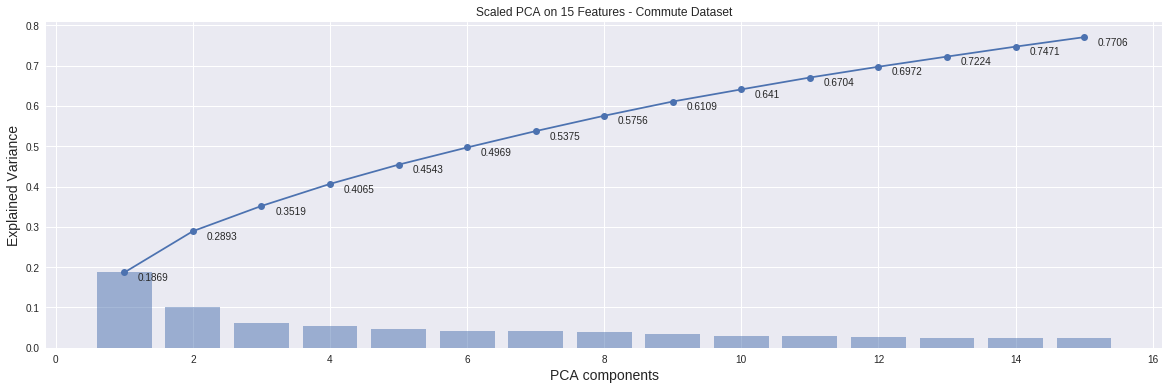

In [21]:
fig = plt.figure(figsize=(20,6))

x = np.arange(1,16)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, cumulative_explained_variance,'-o')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xlabel('PCA components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Scaled PCA on 15 Features - Commute Dataset')
plt.savefig('./figures/pca-15-features.png')

## 5. Cluster Analysis on PCA

* Use unsupervised learning to find clusters of similar data in the principal components.

  8%|▊         | 1/13 [00:00<00:05,  2.29it/s]

For n_clusters = 2 The average silhouette_score is : 0.145551710588


 15%|█▌        | 2/13 [00:00<00:04,  2.67it/s]

For n_clusters = 3 The average silhouette_score is : 0.135913310422


 23%|██▎       | 3/13 [00:01<00:04,  2.43it/s]

For n_clusters = 4 The average silhouette_score is : 0.11182311351


 31%|███       | 4/13 [00:01<00:03,  2.59it/s]

For n_clusters = 5 The average silhouette_score is : 0.110143637985


 38%|███▊      | 5/13 [00:02<00:03,  2.48it/s]

For n_clusters = 6 The average silhouette_score is : 0.103910967559


 46%|████▌     | 6/13 [00:02<00:02,  2.53it/s]

For n_clusters = 7 The average silhouette_score is : 0.100185393557


 54%|█████▍    | 7/13 [00:02<00:02,  2.52it/s]

For n_clusters = 8 The average silhouette_score is : 0.0892039440043


 62%|██████▏   | 8/13 [00:03<00:02,  2.43it/s]

For n_clusters = 9 The average silhouette_score is : 0.0962527903977


 69%|██████▉   | 9/13 [00:03<00:01,  2.43it/s]

For n_clusters = 10 The average silhouette_score is : 0.0945595354722


 77%|███████▋  | 10/13 [00:04<00:01,  2.43it/s]

For n_clusters = 11 The average silhouette_score is : 0.0951218577358


 85%|████████▍ | 11/13 [00:04<00:00,  2.47it/s]

For n_clusters = 12 The average silhouette_score is : 0.0969822691416


 92%|█████████▏| 12/13 [00:04<00:00,  2.43it/s]

For n_clusters = 13 The average silhouette_score is : 0.0979459598182


100%|██████████| 13/13 [00:05<00:00,  2.42it/s]

For n_clusters = 14 The average silhouette_score is : 0.103371981837


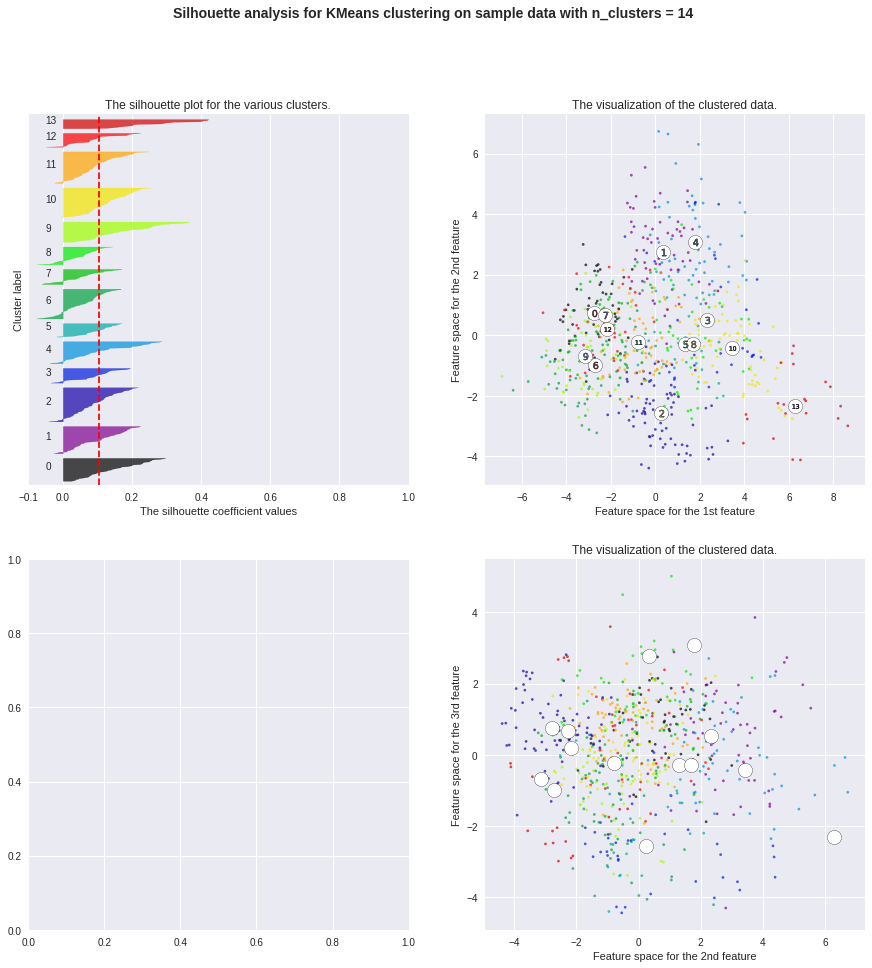

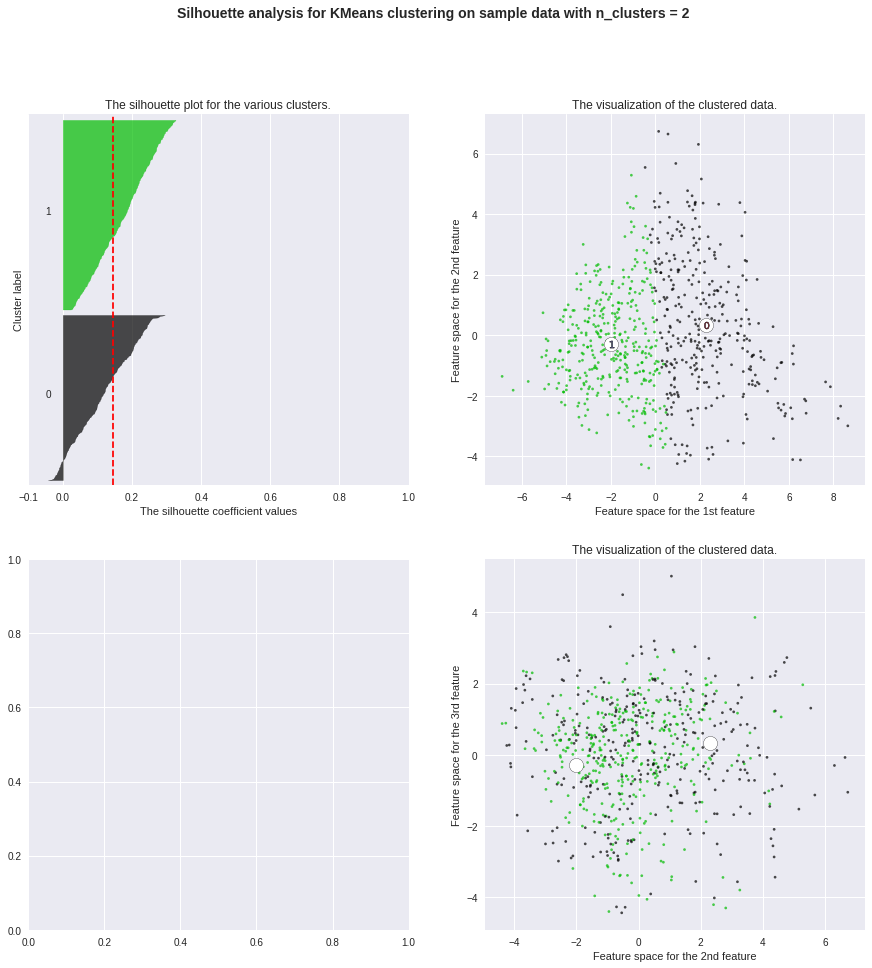

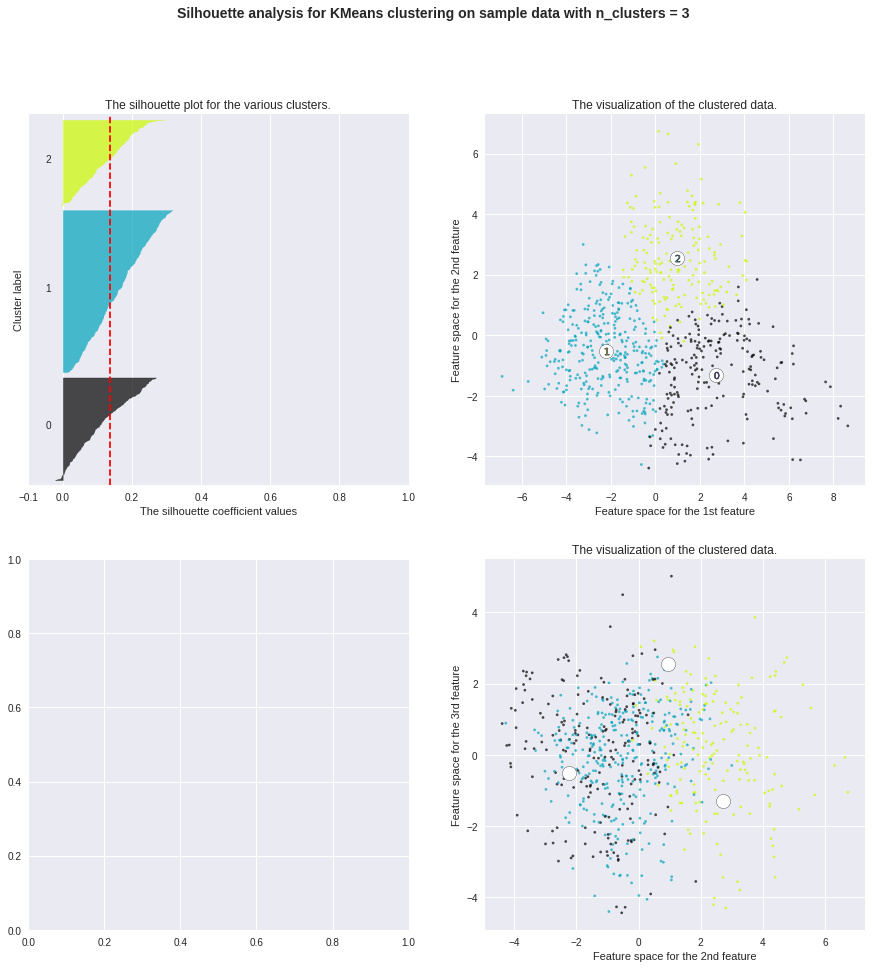

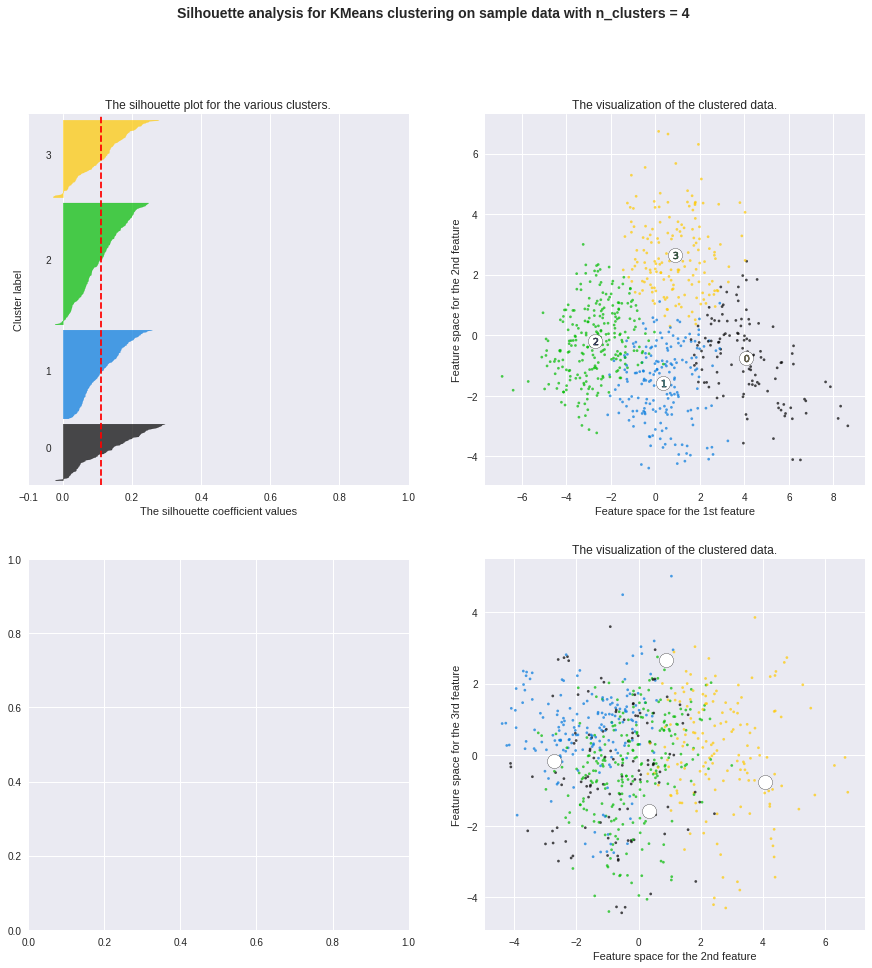

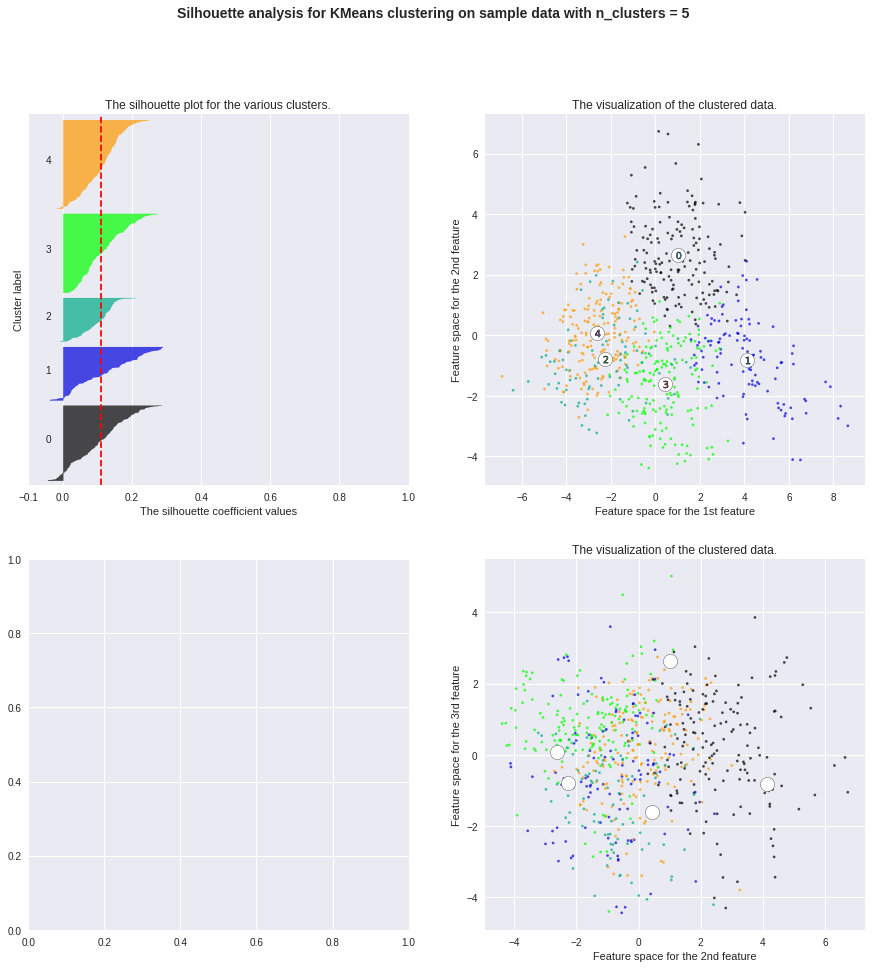

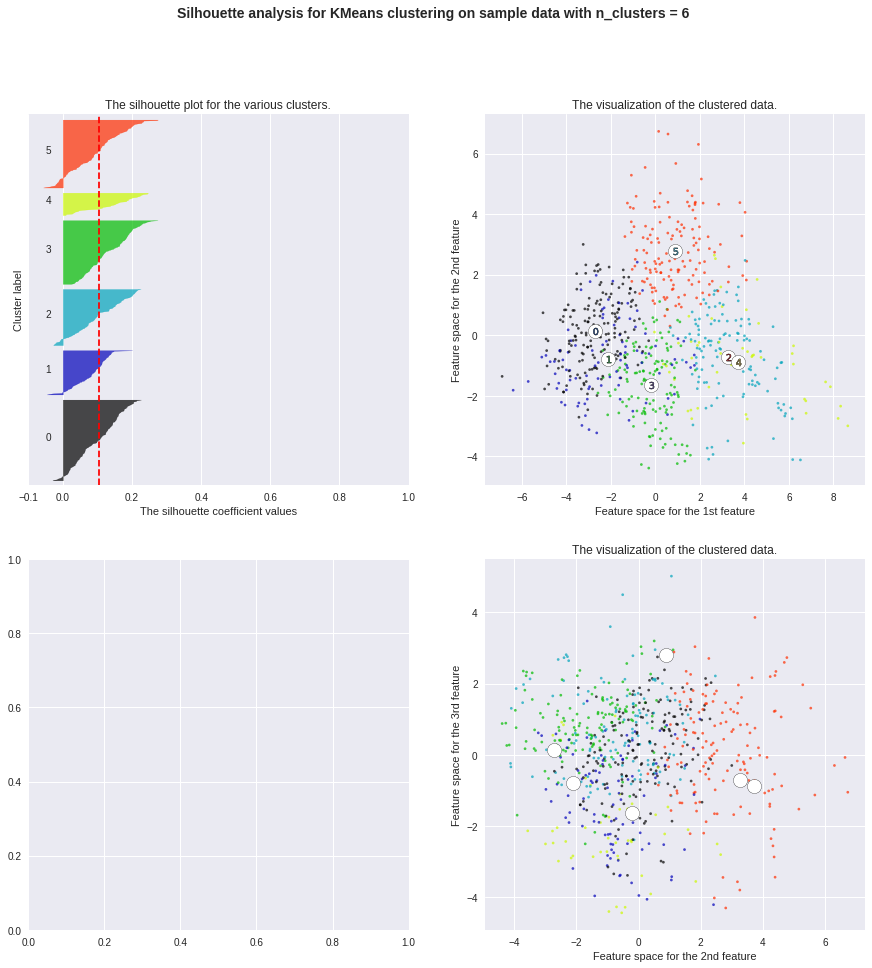

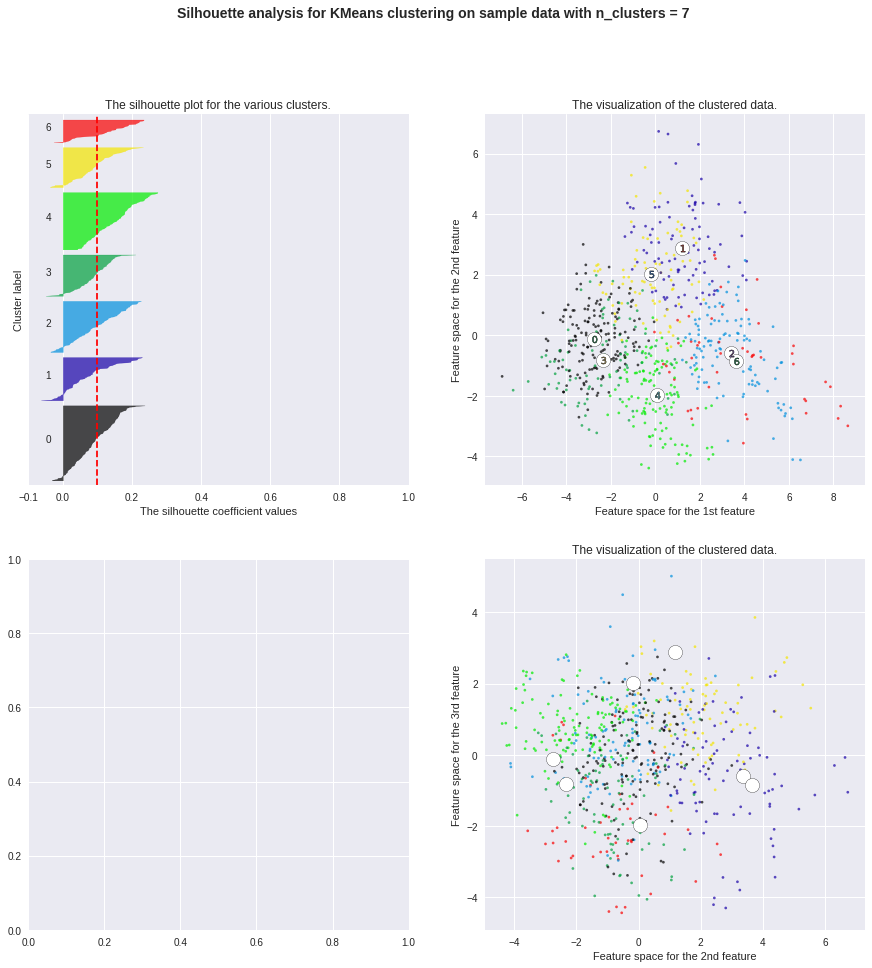

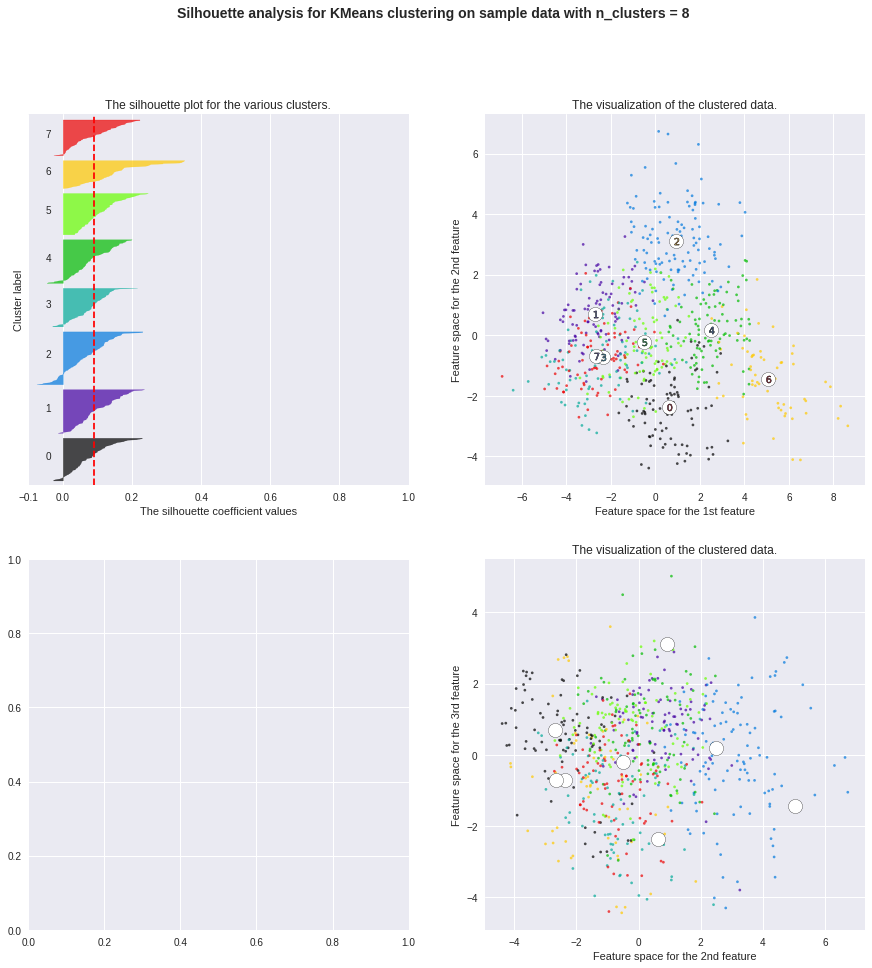

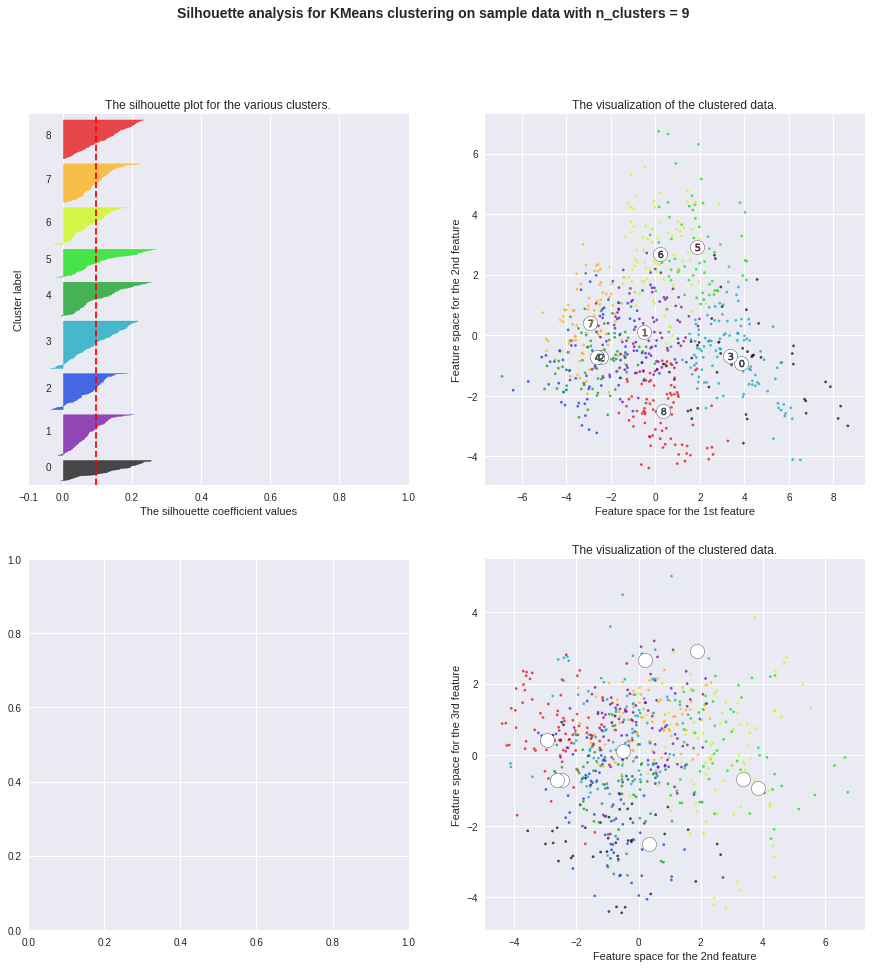

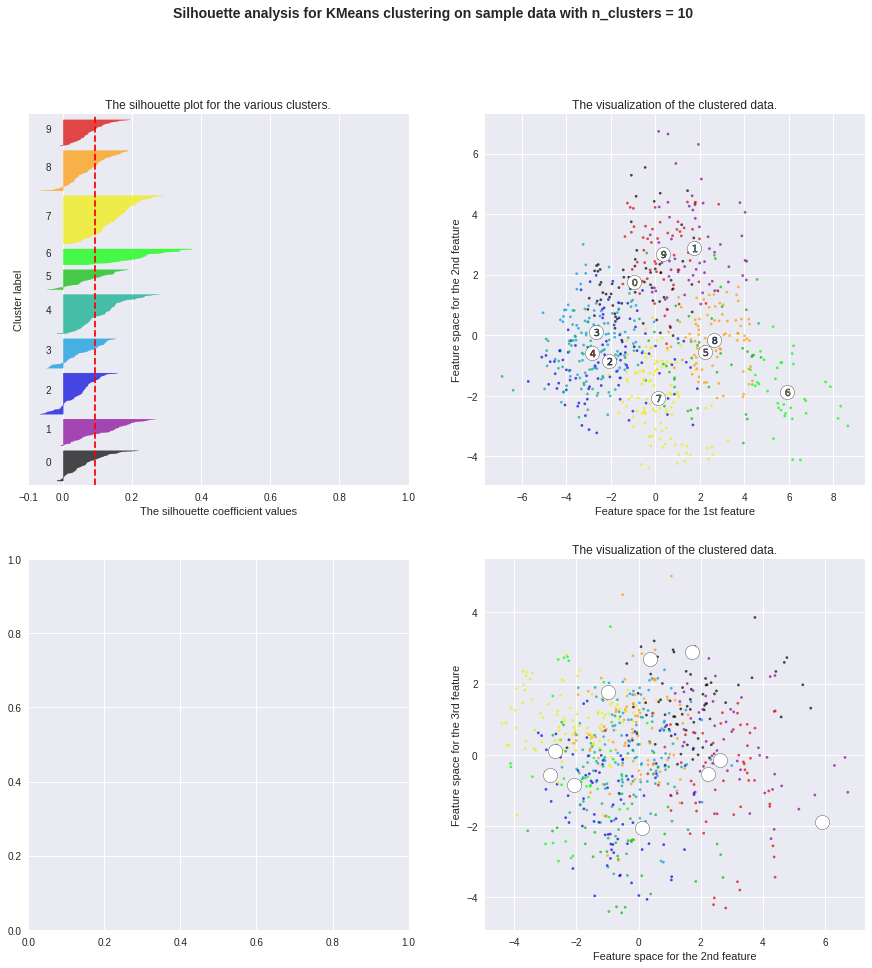

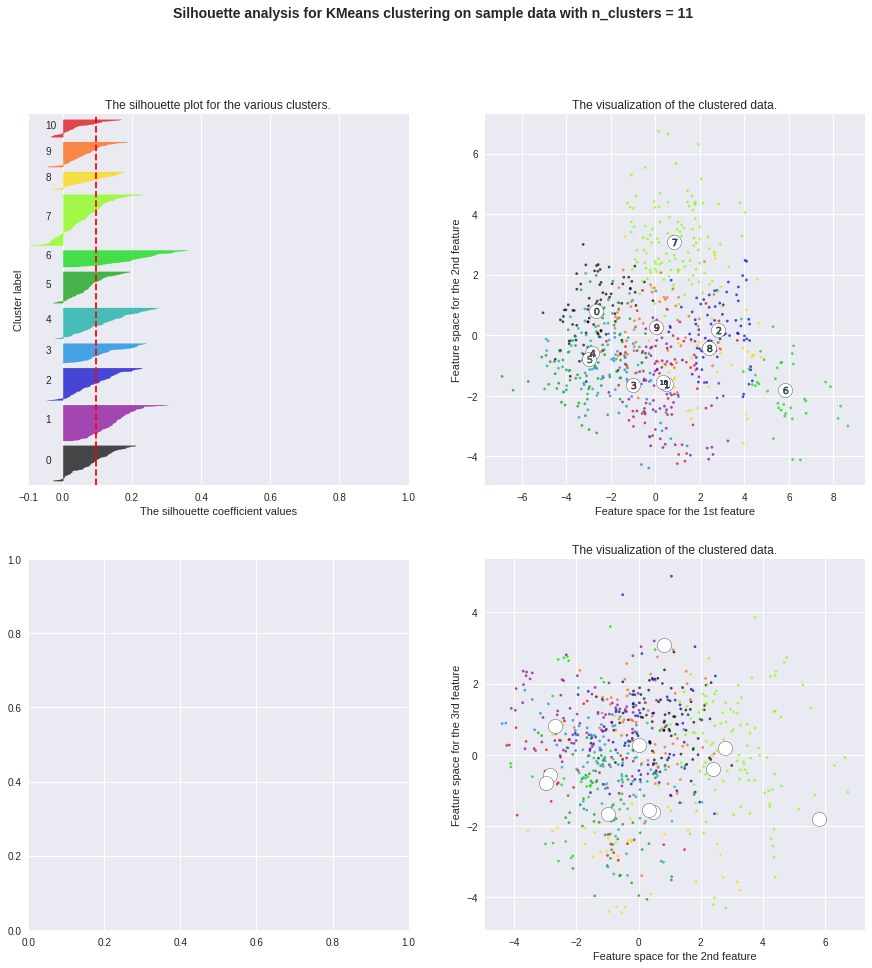

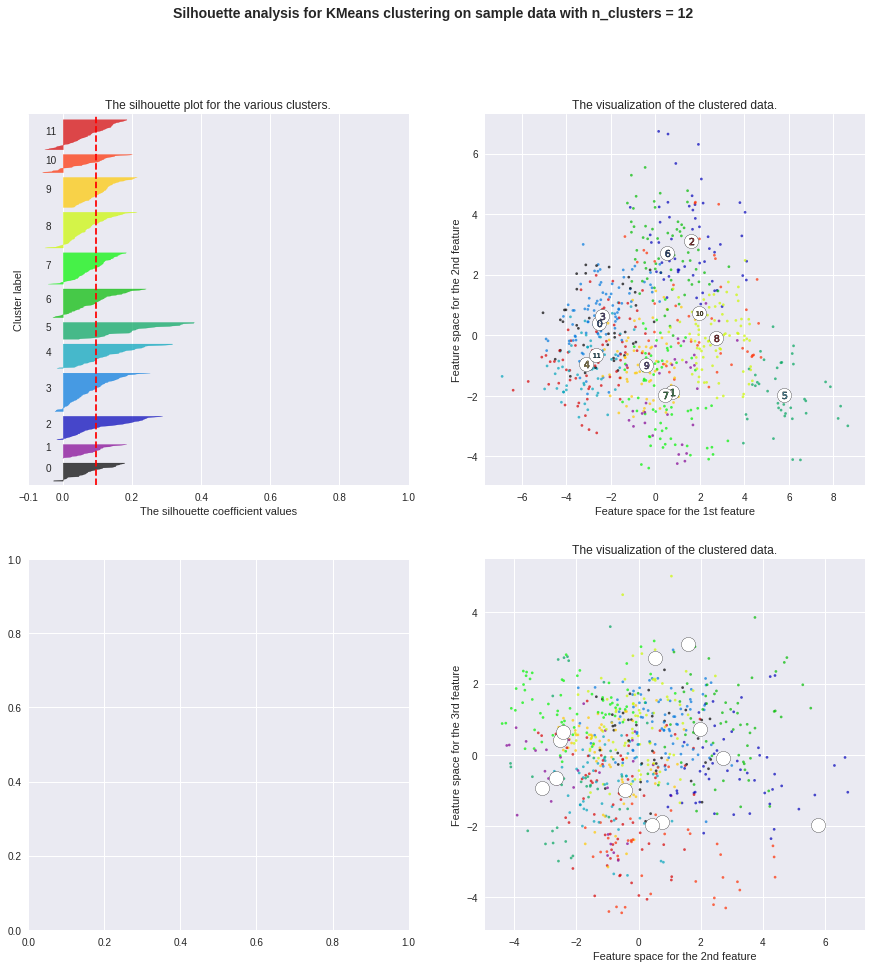

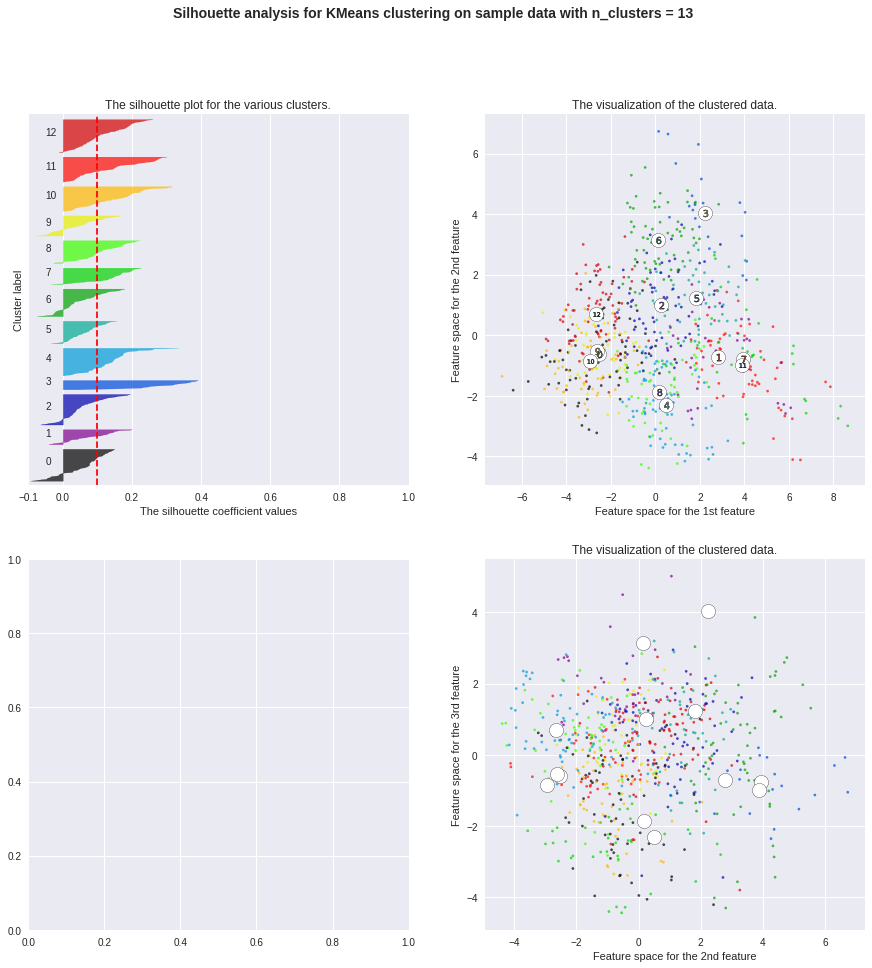

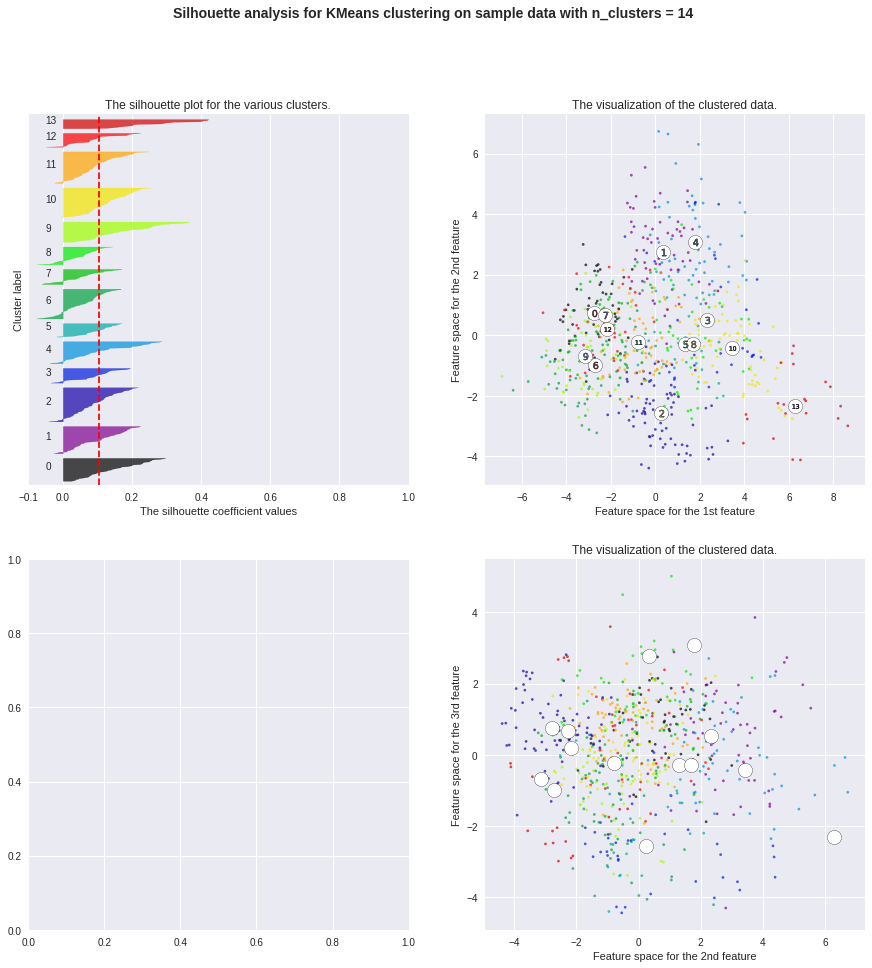

In [22]:
# look at a range of clusters to decide visually which ones represent the data most clearly.
cluster_range(X_train_pca, range(2,15))

100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

For n_clusters = 3 The average silhouette_score is : 0.135861754877


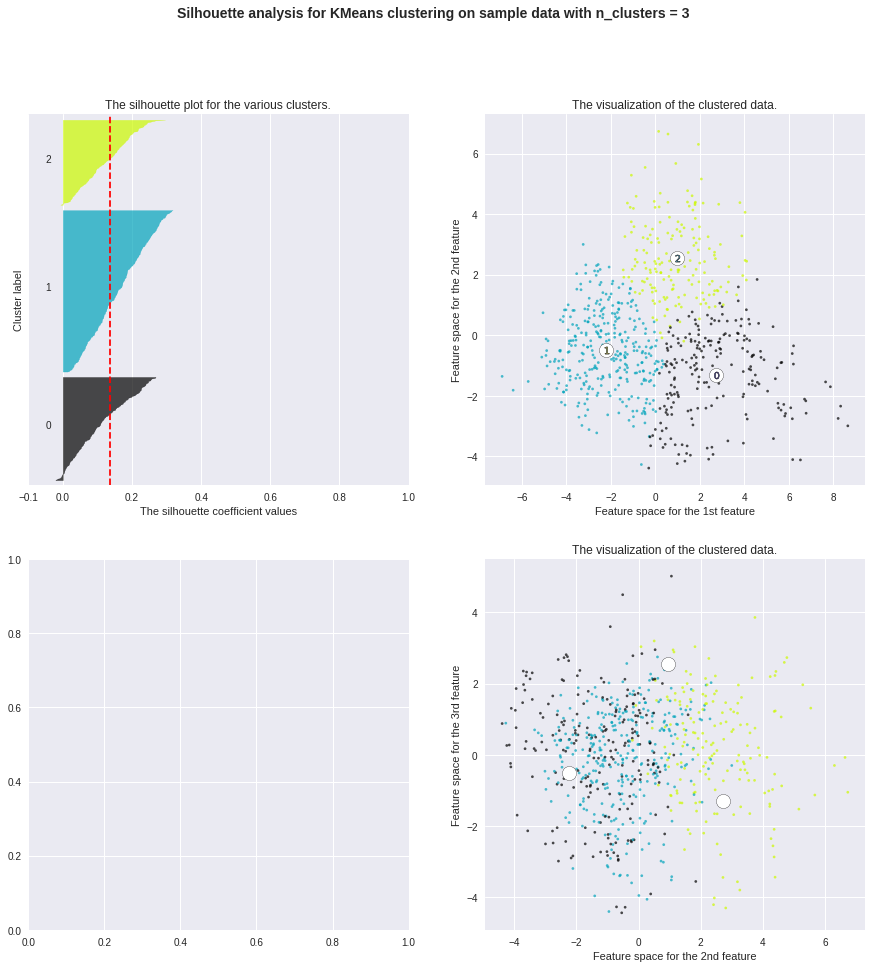

In [23]:
# look at just a cluster of 3, save fig.
cluster_three = cluster_range(X_train_pca, range(3,4))
cluster_three.savefig('./figures/second-try-cluster_analysis_PCA.png')

## 6. Augment Datasets with PCA Data
* Combine numerical and categorical data back together
* Concatenate PCA data to dataset.

In [24]:
for col in X_train_sc_df.columns:
    X_train[col] = X_train_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X_train_plus_pca_df = pd.concat([X_train, X_train_pca_df], axis=1)
X_train_plus_pca_df.shape

(711, 99)

In [26]:
for col in X_test_sc_df.columns:
    X_test[col] = X_test_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
X_test_plus_pca_df = pd.concat([X_test, X_test_pca_df], axis=1)
X_test_plus_pca_df.shape

(306, 99)

## 7. Pickling

In [28]:
# entire X_train and X_test data with augmented deskewed and scaled data and pca data
X_train_plus_pca_df.to_pickle('./data/X_train_plus_pca_df.pkl')
X_test_plus_pca_df.to_pickle('./data/X_test_plus_pca_df.pkl')

# X_train and X_test pca data
X_train_pca_df.to_pickle('./data/X_train_pca_df.pkl')
X_test_pca_df.to_pickle('./data/X_test_pca_df.pkl')

# y_train, y_test to run models.
y_train.to_pickle('./data/y_train_new.pkl')
y_test.to_pickle('./data/y_test_new.pkl')